In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_btc_csv(filepath):
    # Función que permite convertir el formato de las fechas como unix time
    # en un objeto de fecha.
    def unix_time_to_date(x): return pd.to_datetime(x, unit='s')
    return pd.read_csv(filepath, parse_dates=['Timestamp'], date_parser=unix_time_to_date, index_col='Timestamp')

In [3]:
df = load_btc_csv('../datasets/processed/btc_features_daily.csv')

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'rsi_5', 'rsi_10', 'rsi_15', 'rsi_30', 'log_ret', 'autocorr_1',
       'autocorr_3', 'autocorr_5', 'vol_5', 'vol_10', 'vol_15', 'vol_30',
       'bsadf_nt_1', 'bsadf_nt_2', 'bsadf_nt_3', 'bsadf_ct_1', 'bsadf_ct_2',
       'bsadf_ct_3', 'bsadf_ctt_1', 'bsadf_ctt_2', 'bsadf_ctt_3', 'OpenFFD',
       'HighFFD', 'LowFFD', 'CloseFFD', 'Volume_(BTC)FFD',
       'Volume_(Currency)FFD'],
      dtype='object')

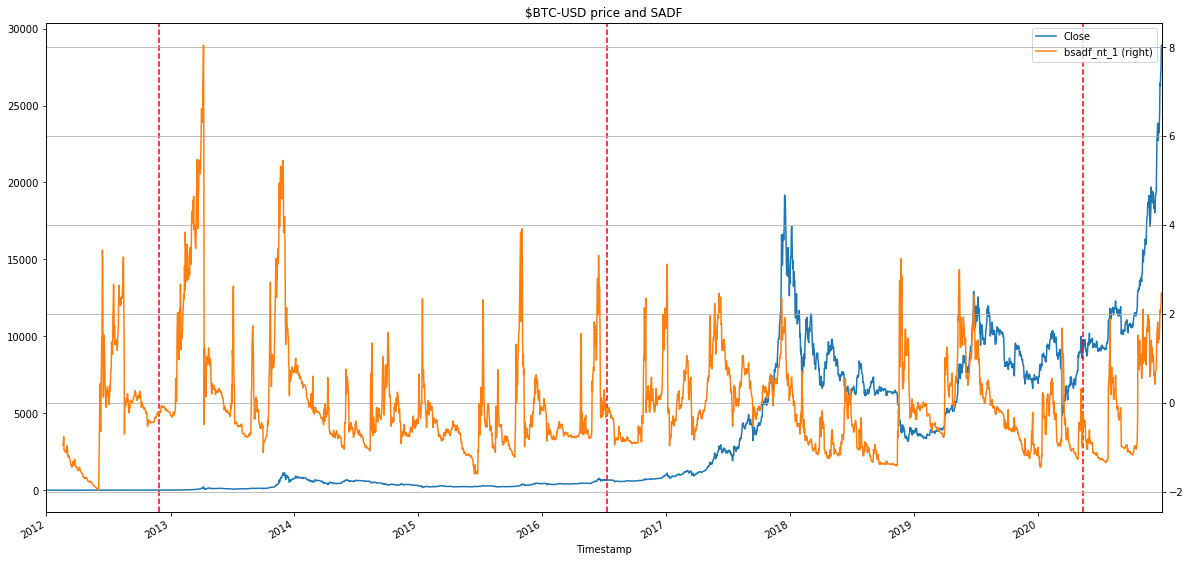

In [5]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
df[['Close','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax)
ax.axvline(pd.datetime(year=2012, month=11, day=28), ls='--', color='r')
ax.axvline(pd.datetime(year=2016, month=7, day=9), ls='--', color='r')
ax.axvline(pd.datetime(year=2020, month=5, day=11), ls='--', color='r')
plt.title('$BTC-USD price and SADF')
plt.xlabel('Date')
plt.grid()
plt.show()

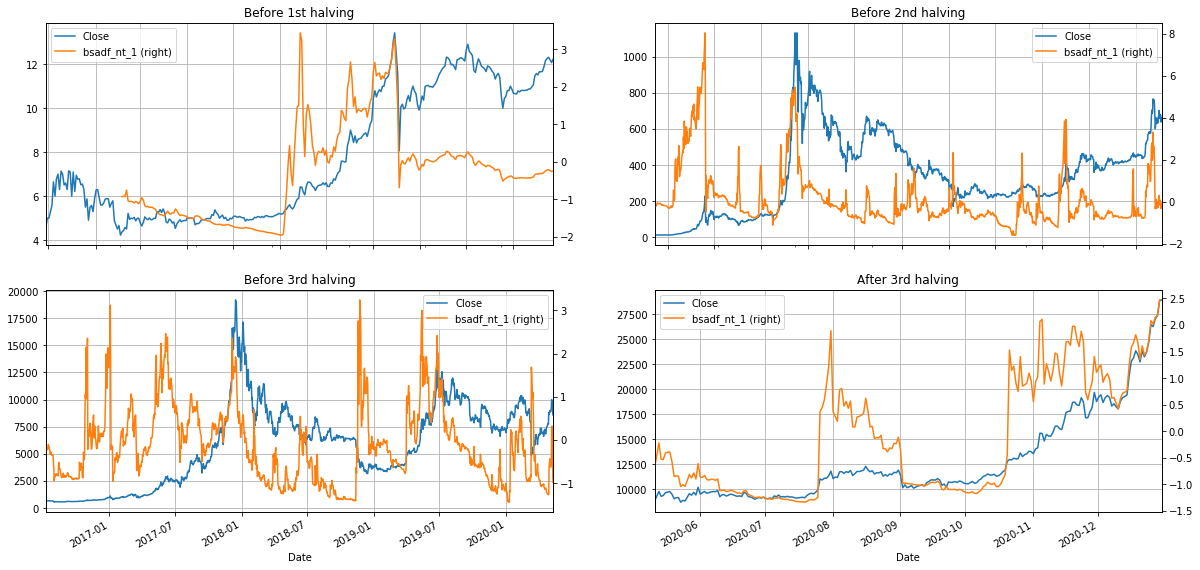

In [6]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

mask = df.index < pd.datetime(year=2012, month=11, day=28)
df.loc[mask, ['Close','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax[0][0])

mask = ((df.index >= pd.datetime(year=2012, month=11, day=28)) & (df.index < pd.datetime(year=2016, month=7, day=9)))
df.loc[mask, ['Close','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax[0][1])

mask = ((df.index >= pd.datetime(year=2016, month=7, day=9)) & (df.index < pd.datetime(year=2020, month=5, day=11)))
df.loc[mask, ['Close','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax[1][0])

mask = (df.index >= pd.datetime(year=2020, month=5, day=11))
df.loc[mask, ['Close','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax[1][1])

ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

ax[0][0].set_title('Before 1st halving')
ax[0][1].set_title('Before 2nd halving')
ax[1][0].set_title('Before 3rd halving')
ax[1][1].set_title('After 3rd halving')

ax[0][0].set_xlabel('Date')
ax[0][1].set_xlabel('Date')
ax[1][0].set_xlabel('Date')
ax[1][1].set_xlabel('Date')

plt.show()

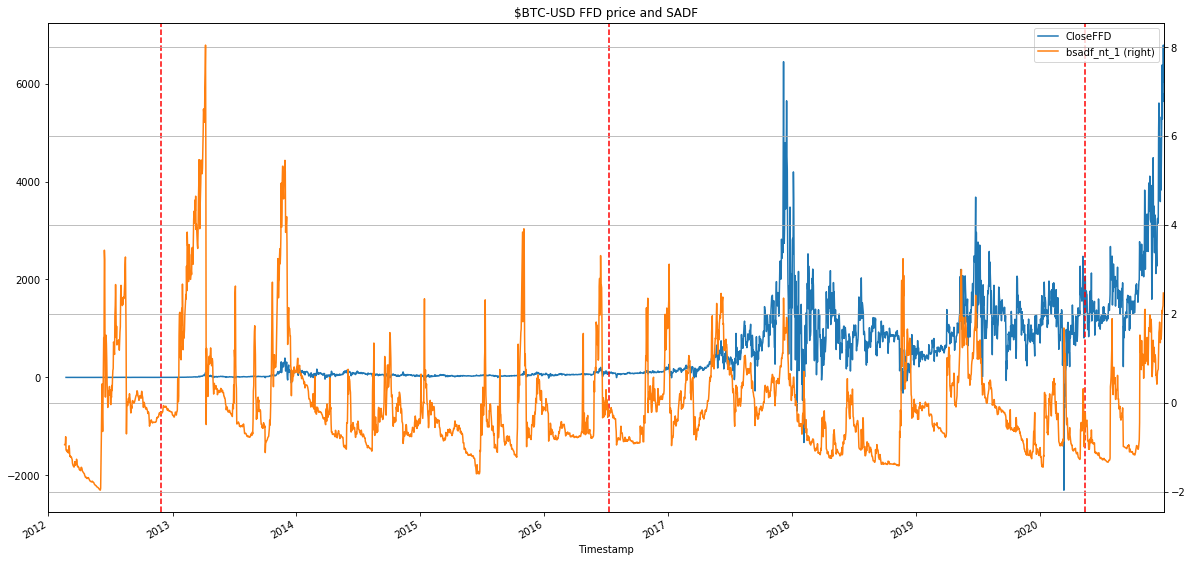

In [7]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
df[['CloseFFD','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax)
ax.axvline(pd.datetime(year=2012, month=11, day=28), ls='--', color='r')
ax.axvline(pd.datetime(year=2016, month=7, day=9), ls='--', color='r')
ax.axvline(pd.datetime(year=2020, month=5, day=11), ls='--', color='r')
plt.title('$BTC-USD FFD price and SADF')
plt.xlabel('Date')
plt.grid()
plt.show()

/home/agustin/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


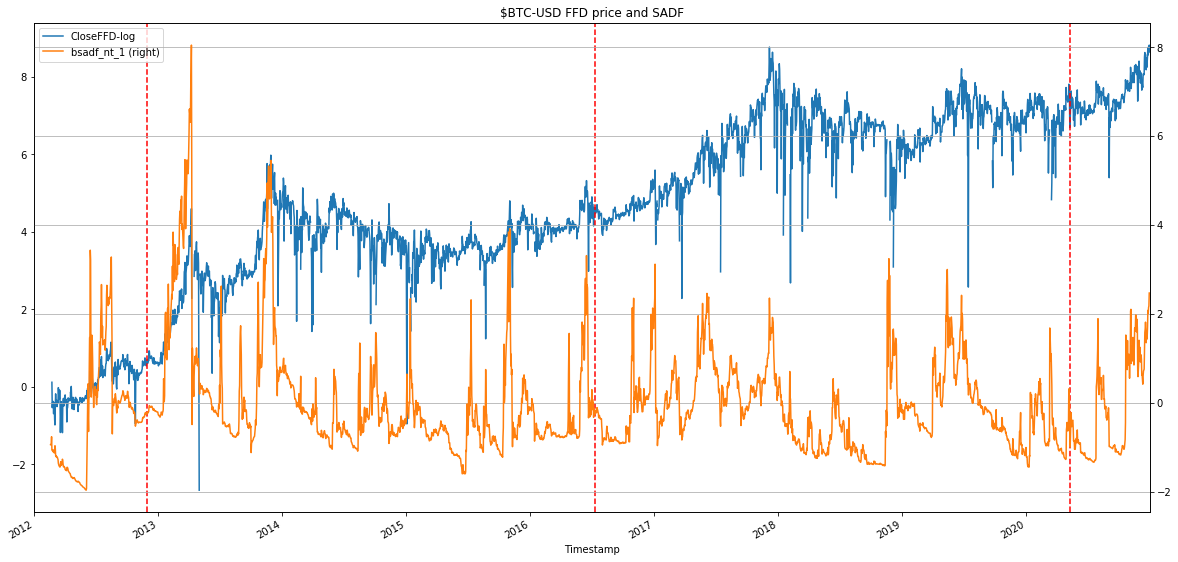

In [9]:
# Ploteamos la series.
df['CloseFFD-log'] = np.log(df['CloseFFD'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
df[['CloseFFD-log','bsadf_nt_1']].plot(kind='line', secondary_y='bsadf_nt_1',  ax=ax)
ax.axvline(pd.datetime(year=2012, month=11, day=28), ls='--', color='r')
ax.axvline(pd.datetime(year=2016, month=7, day=9), ls='--', color='r')
ax.axvline(pd.datetime(year=2020, month=5, day=11), ls='--', color='r')
plt.title('$BTC-USD FFD price and SADF')
plt.xlabel('Date')
plt.grid()
plt.show()